# 1) Problem Statement
The aim is to predict the customer churn rate based on historical churn data

# 2) Data
Data is made available in csv format with 10000 entries and __ columns

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
df = pd.read_excel('data\customer_churn_large_dataset.xlsx')

In [13]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [14]:
df.shape

(100000, 9)

Dataset columns are CustomerID, Name, Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB, Churn

# 3) Data Checks performed
1. Check missing values
2. Check duplicates
3. Check datatypes of each columns 
4. Check number of unique values in each columns
5. Check statistics
6. Check categories of each column

In [15]:
#checking missing values
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [16]:
#checking duplicated values
df.duplicated().sum()

0

In [17]:
#checking datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [18]:
#checking number of unique values in each column
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [19]:
#checking statistics of the data
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


From this the insight is that about 75 percent of customers have zero churn.

In [21]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [29]:
#checking for categories in variables
print('Categories in Gender variable')
print(df['Gender'].unique())

print('Categories in Location variable')
print(df['Location'].unique())

print('Categories in Churn variable')
print(df['Churn'].unique())

Categories in Gender variable
['Male' 'Female']
Categories in Location variable
['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
Categories in Churn variable
[0 1]


In [27]:
categorical_features = ['CustomerID','Name', 'Gender', 'Location', 'Churn']
numerical_features = [features for features in df.columns if features not in categorical_features]

In [28]:
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features: ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
We have 5 categorical features: ['CustomerID', 'Name', 'Gender', 'Location', 'Churn']


In [47]:
young_max_users = df[df['Age'] <= 40]['Churn'].count()
print(young_max_users)
old_max_users = df[df['Age'] > 40]['Churn'].count()
print(old_max_users)


43287
56713


More customer belong to age group more than 40

# 4) Exploratory Data Analysis (EDA) - Visualization
1. Histogram
2. Kernel Density Estimation (KDE)

d:\Programming\AIML\Customer Churn Prediction\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Programming\AIML\Customer Churn Prediction\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Programming\AIML\Customer Churn Prediction\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Programming\AIML\Customer Churn Prediction\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

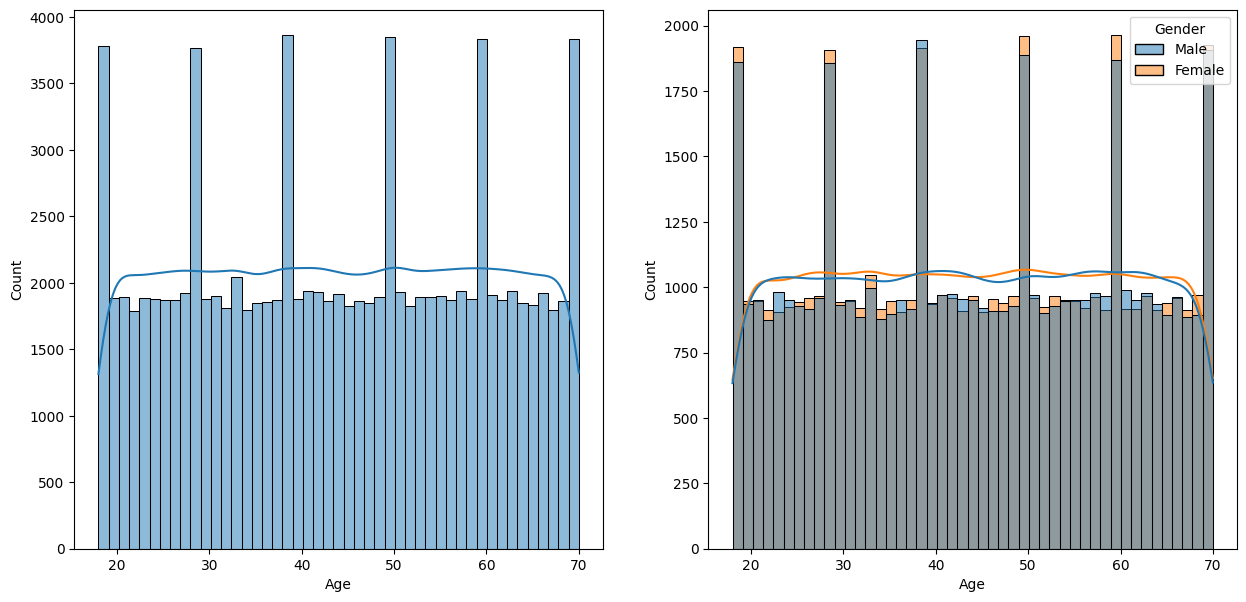

In [66]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'Age', kde = True)
plt.subplot(1, 2, 2)
sns.histplot(data = df, x = 'Age', kde = True, hue = 'Gender')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'Age', kde = True)
plt.subplot(1, 2, 2)
sns.histplot(data = df, x = 'Age', kde = True, hue = 'Gender')
plt.show()